# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = '../Part01//lena.png'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

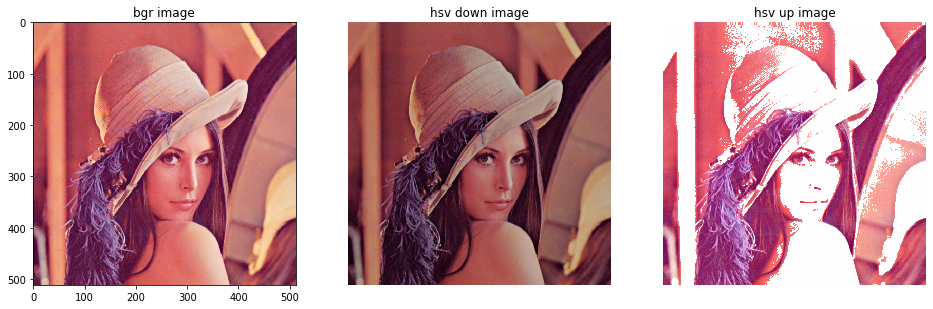

In [3]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., -1] = img_hsv_down[..., -1]/255 - change_percentage
img_hsv_down[img_hsv_down[..., -1] < 0] = 0
img_hsv_down[..., -1] = img_hsv_down[..., -1]*255
img_hsv_down = img_hsv_down.astype('uint8')

# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., -1] = img_hsv_up[..., -1]/255 + change_percentage
img_hsv_up[img_hsv_up[..., -1] > 1] = 1
img_hsv_up[..., -1] = img_hsv_up[..., -1]*255
img_hsv_up = img_hsv_up.astype('uint8')

# 轉換 color space 回 BGR
img_hsv_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2BGR)
img_hsv_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2BGR)


## OpenCV 組合圖片 + 顯示圖片
#img_hsv_change = np.hstack((img, img_hsv_down, img_hsv_up))
#while True:
#    cv2.imshow('change saturation', img_hsv_change)
#    
#    k = cv2.waitKey(0)
#    if k == 27:
#        cv2.destroyAllWindows()
#        break

#Plt 組合圖片 + 顯示圖片
#OpenCV is BGR Cover to Plt RGB
b,g,r = cv2.split(img)  
img_plt = cv2.merge([r,g,b])

b,g,r = cv2.split(img_hsv_down)  
img_hsv_down_plt = cv2.merge([r,g,b])

b,g,r = cv2.split(img_hsv_up)  
img_hsv_up_plt = cv2.merge([r,g,b])

plt.figure(num='astronaut',figsize=(16,8))  #创建一个名为astronaut的窗口,并设置大小 

plt.subplot(1,3,1)     #将窗口分为两行两列四个子图，则可显示四幅图片
plt.title('bgr image')   #第一幅图片标题
plt.imshow(img_plt)

plt.subplot(1,3,2)     #第二个子图
plt.title('hsv down image')   #第二幅图片标题
plt.imshow(img_hsv_down_plt)
plt.axis('off')     #不显示坐标尺寸

plt.subplot(1,3,3)     #第三个子图
plt.title('hsv up image')   #第三幅图片标题
plt.imshow(img_hsv_up_plt)
plt.axis('off')     #不显示坐标尺寸

plt.show()   #显示窗口

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [5]:
# case 1
img_bgr_equal = img.copy()
# 每個 channel 個別做直方圖均衡
for i in range(3):
    equalHist_by_channel = cv2.equalizeHist(img[..., i])
    
# 組合經過直方圖均衡的每個 channel
img_bgr_equal[..., i] = equalHist_by_channel

# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
#img_hsv_equal = 
img_hsv_equal = img_hsv.copy()
img_hsv_equal[..., 2] = cv2.equalizeHist(img_hsv[..., 2])
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2BGR)

# 組合圖片 + 顯示圖片
img_bgr_equalHist = np.hstack((img, img_bgr_equal, img_hsv_equal))
while True:
    # 比較 (原圖, BGR color space 對每個 channel 做直方圖均衡, HSV color space 對明度做直方圖均衡)
    cv2.imshow('bgr equal histogram', img_bgr_equalHist)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

## 調整對比 / 明亮

In [6]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
#add_contrast = 
#add_lighness = 
add_contrast = cv2.convertScaleAbs(img, alpha=2.0, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=50)

# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img, add_contrast, add_lighness))
while True:
    # 比較不同程度的對比 / 明亮
    cv2.imshow('adjust contrast and brighness', img_contrast_light)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break